# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [4]:
train.shape

(4234042, 4)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
train.isnull().any()

title            False
description       True
Category_name    False
Category         False
dtype: bool

In [6]:
cat_features_mask_tr = (train.dtypes == "object").values
train_real = train[train.columns[~cat_features_mask_tr]]
train_cat = train[train.columns[cat_features_mask_tr]].fillna("")
train_no_mis = pd.concat([train_real, train_cat], axis=1)
train_no_mis.isnull().any()

Category         False
title            False
description      False
Category_name    False
dtype: bool

In [7]:
test.isnull().any()

title          False
description     True
itemid         False
dtype: bool

In [8]:
cat_features_mask_te = (test.dtypes == "object").values
test_real = test[test.columns[~cat_features_mask_te]]
test_cat = test[test.columns[cat_features_mask_te]].fillna("")
test_no_mis = pd.concat([test_real, test_cat], axis=1)
test_no_mis.isnull().any()

itemid         False
title          False
description    False
dtype: bool

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [9]:
train_no_mis['title_desc'] = train_no_mis['title'] + ' ' + train_no_mis['description']
train_no_mis.head()

,Category,title,description,Category_name,title_desc
0,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,21,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2,114,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,Возвму машину с выкупом Возьму машину в аренду...
3,27,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары","Полусапожки полусапожки в отличном состоянии, ..."
4,27,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",Босоножки кожаные Кожаные(натур) босоножки Kar...


In [10]:
test_no_mis['title_desc'] = test_no_mis['title'] + ' ' + test_no_mis['description']
test_no_mis.head()

,itemid,title,description,title_desc
0,1778449823,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,Мастерка Мастерка фирмы форвард. Белого цвета....
1,1677656962,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...","Зимние сапоги Продаю зимние сапоги, в хорошем ..."
2,1758182804,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,Видеонаблюдение 8 камер В комплект Atis AMD-2M...
3,1689811299,Запчасти для GLE,Запчасти GLE,Запчасти для GLE Запчасти GLE
4,1804706240,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,Бластер nerf Состояние 5+/\nПродаю потому что ...


## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [11]:
print(train_no_mis['Category_name'].nunique())

50


In [12]:
# category_count=train_no_mis.groupby('Category_name')['Category'].count()
category_count = train_no_mis.groupby(['Category_name'], as_index=False)['Category'].count()
category_perc=category_count['Category'].apply(lambda x: 100*x/len(train_no_mis))
data = pd.concat([category_count['Category_name'], category_perc], axis=1)
print(data)

                   Category_name   Category
0                     Автомобили   2.970637
1                       Аквариум   0.123546
2                  Аудио и видео   1.968143
3           Билеты и путешествия   0.068162
4                Бытовая техника   1.675420
5                       Вакансии   0.640263
6                     Велосипеды   0.460269
7               Водный транспорт   0.115233
8           Гаражи и машиноместа   0.314758
9                 Готовый бизнес   0.097401
10       Грузовики и спецтехника   0.405452
11        Детская одежда и обувь  13.639425
12          Дома, дачи, коттеджи   1.139195
13               Другие животные   0.280465
14         Запчасти и аксессуары  17.493946
15             Земельные участки   0.638066
16   Игры, приставки и программы   0.621746
17                      Квартиры   3.359343
18               Книги и журналы   1.394767
19            Коллекционирование   2.376122
20     Коммерческая недвижимость   0.517945
21                       Комнаты

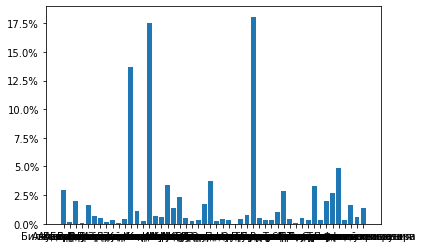

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
category_count = train_no_mis.groupby(['Category_name'], as_index=False)['Category'].count()
category_perc1=category_count['Category'].apply(lambda x: x/len(train_no_mis))
data = pd.concat([category_count['Category_name'], category_perc1], axis=1)
plt.bar(x=data['Category_name'], height = data['Category'])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.rcParams['figure.figsize'] = [40, 60]
plt.rcParams['figure.dpi'] = 100 
plt.show()

In [43]:
print('Одежда, обувь, аксессуары ', max(category_perc))#макс процент
print('Недвижимость за рубежом', min(category_perc))#мин процент

Одежда, обувь, аксессуары  18.07067572782698
Недвижимость за рубежом 0.0038969854337769913


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
samp = train_no_mis.sample(100000)#обойти memory error только в этом задании
train_vec = vec.fit_transform(samp['title_desc'])
train_vec.shape

(100000, 232053)

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [16]:
print(list(vec.vocabulary_.items())[:10])

[('рюкзак', 191982), ('звезды', 116080), ('со', 199522), ('звёздами', 116258), ('отлично', 159498), ('подойдет', 170024), ('для', 106910), ('девушек', 104381), ('компактный', 127603), ('вместительный', 92445)]


In [17]:
import re

p = [x[0] for x in list(vec.vocabulary_.items())]
s = ' '.join(p)
print(re.findall(r"[0-9]\w+", s))

['31', '22', '11', '300', '61', '50', '52', '54', '56', '58', '10', '15', '20', '80', '1998', '2006', '80', '1996', '9187069', '6489', '8641281', '150', '24', '40', '3gb', '1060', '08', '29', '3000', '728', '25133', '930', '897', '27688', '264w', '60', '48', '3w', '12', '10w', '83', '90', '110', '1330мм', '6000k', '30', '038', '63см', '40см', '95е', '0046', '2008', '350', '49', '400', '1623', '2700', '100х50', '50х50', '50мм', '3х', '46', '500', '165', '168', '450', '450', '008', '04', '3w7u002138', '100', '1500', '4330', '4gh', '3g', '800', '23', '14', '5см', '17', '225', '65', '16', '2010г', '00', '18', '21', '2009', '86', '13884', '2000913759901', '200', '000', '2005', '2х', '400ват', '2г', '320г', '9800gt', '512m', '256b', '10', '185', '75', '16c', '104', '235', '5мм', '3d', '2019', '122', '5мт', '16', '1394544', '03249', '19', '7p6807221c', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '0006727729032707', '70000', '42', '44', '59', '94', '88', '93', '20м'

In [18]:
print(len(re.findall(r"[0-9]\w+", s)))

49734


In [42]:
print(re.findall(r'[!"#$%&\'()*+,-./:;«»—<=>?@\^_`{|}~]\w+', s))
print(len(re.findall(r'[!"#$%&\'()*+,-./:;«»—<=>?@\^_`{|}~]\w+', s)))

['______________________________________________________', '_____________________________________________________', '_________________________________________________', '_house_kzn', '_ufa', '______________________________', '________________________________________________', '________________________________________________________', '_________________________________________________________', '____________________________________________________________', '_14', '_eyelashes_', '_самовывоз', '_euro', '_kids', '_________________________________', '________________________', '_________________________', '______________________', '_ceed', '__________________________', '____________________________________________________', '_______________________', '_spb_evgenia_', '__________________________________________________________', '____________________________________________', '_____', '____________________________', '___________________________', '__', '____________________________________

## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [20]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
#nltk.download('stopwords')
stemmer = SnowballStemmer('russian')
sw = stopwords.words('russian')
def tok(s):
    s = re.sub('[0-9]|[!"#$%&\'()*+,-./:;«»—<=>?@\^_`{|}~]', '', s.lower())
    ll = [x for x in word_tokenize(s) if x not in sw]
    return [stemmer.stem(x) for x in ll]

In [21]:
tok(train_no_mis['title_desc'][0])

['эб',
 'renault',
 'nissan',
 'dci',
 'delphi',
 'год',
 'комплект',
 'эб',
 'мозг',
 'компьютер',
 'мотор',
 'двигател',
 'коммутатор',
 'электрон',
 'блок',
 'управлен',
 'двигател',
 'компьютер',
 'мотор',
 'рен',
 'kangoo',
 'канг',
 'канг',
 'мега',
 'сценик',
 'laguna',
 'лагун',
 'clio',
 'кли',
 'nissan',
 'micra',
 'нисса',
 'микр',
 'друг',
 'рен',
 'нисса',
 'дизел',
 'топливн',
 'аппаратур',
 'делф',
 'бу',
 'оригина',
 'отличн',
 'состоян',
 'проверен',
 'гарант',
 'запчаст',
 'предоставля',
 'гарант',
 'возможн',
 'установк',
 'подробн',
 'раздел',
 'компан',
 'дорож',
 'сво',
 'репутац',
 'торгу',
 'легальн',
 'контрактн',
 'запчаст',
 'дета',
 'налич',
 'таможен',
 'документ',
 'запчаст',
 'автомобил',
 'пробег',
 'росс',
 'отправля',
 'друг',
 'регион',
 'таможен',
 'союз',
 'транспортн',
 'компан',
 'наложн',
 'платеж']

In [22]:
import time
start_time1 = time.time()
train_no_mis['title_desc'].sample(100000).apply(tok)
print(f"--- {(time.time() - start_time1)} seconds ---")

--- 225.38321924209595 seconds ---


## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [23]:
custom_vec = CountVectorizer(tokenizer=tok)
rows = train_no_mis.sample(100000)
X = custom_vec.fit_transform(rows['title_desc'])
X.shape

(100000, 159312)

In [24]:
from sklearn.model_selection import train_test_split
y = rows['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [25]:
from sklearn.linear_model import SGDClassifier
sgdclass = SGDClassifier()
sgdclass.fit(X_train, y_train)
y_pr_train = sgdclass.predict(X_train)
y_pr_test = sgdclass.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
print('ac score train', accuracy_score(y_train, y_pr_train))
print('ac score test',accuracy_score(y_test, y_pr_test))

ac score train 0.92125
ac score test 0.82355


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
custom_tf = TfidfVectorizer(tokenizer=tok)
X = custom_tf.fit_transform(rows['title_desc'])
X.shape

(100000, 159312)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [29]:
sgdclass.fit(X_train, y_train)
y_pr_train = sgdclass.predict(X_train)
y_pr_test = sgdclass.predict(X_test)

In [30]:
print('ac score train', accuracy_score(y_train, y_pr_train))
print('ac score test',accuracy_score(y_test, y_pr_test))

ac score train 0.883975
ac score test 0.8302


In [31]:
##############################################################

In [32]:
custom_tf_ = TfidfVectorizer(tokenizer=tok, max_df = 0.9)
X = custom_tf_.fit_transform(rows['title_desc'])
X.shape

(100000, 159312)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [34]:
sgdclass.fit(X_train, y_train)
y_pr_train = sgdclass.predict(X_train)
y_pr_test = sgdclass.predict(X_test)

In [35]:
print('ac score train', accuracy_score(y_train, y_pr_train))
print('ac score test',accuracy_score(y_test, y_pr_test))

ac score train 0.884125
ac score test 0.83055


In [ ]:
#матрица не изменилась, качество практически тоже

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [36]:
from sklearn.feature_extraction.text import HashingVectorizer
custom_hash = HashingVectorizer(tokenizer=tok, n_features = 30000)
X = custom_hash.fit_transform(rows['title_desc'])
X.shape

C:\ANAC\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(100000, 30000)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [38]:
sgdclass.fit(X_train, y_train)
y_pr_train = sgdclass.predict(X_train)
y_pr_test = sgdclass.predict(X_test)

In [39]:
print('ac score train', accuracy_score(y_train, y_pr_train))
print('ac score test',accuracy_score(y_test, y_pr_test))

ac score train 0.85215
ac score test 0.81245


In [40]:
#второй подход с TF-IDF показал немного лучше результаты, чем первый подход. А у третьего заметно ниже результат двух предыдущих подходов. Попытка поставить max_df во втором подходе ничего не изменила(изначально не было слов, которые бы показывали единицу)

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
rows = train_no_mis.sample(100000)
custom_tf = TfidfVectorizer(tokenizer=tok)
X_train = custom_tf.fit_transform(rows['title_desc'])
X_test = custom_tf.transform(test_no_mis['title_desc'])

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdclass = SGDClassifier()
sgdclass.fit(X_train, train_no_mis['Category'])
y_pr_test = sgdclass.predict(X_test)
print(y_pr_test)